In [1]:
training = open('./TrainingData.csv', encoding='utf8').read().strip().split('\n')
validation = open('./ValidationData.csv', encoding='utf8').read().strip().split('\n')

labels = training.pop(0).split(',')
validation.pop(0)

t = []
v = []
for row in training:
  t.append(row.split(','))

for row in validation:
  v.append(row.split(','))

print(labels)
print(f"Format training: {len(t)}*{len(t[0])}")
print(f"Format validation: {len(v)}*{len(v[0])}")

['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007', 'WAP008', 'WAP009', 'WAP010', 'WAP011', 'WAP012', 'WAP013', 'WAP014', 'WAP015', 'WAP016', 'WAP017', 'WAP018', 'WAP019', 'WAP020', 'WAP021', 'WAP022', 'WAP023', 'WAP024', 'WAP025', 'WAP026', 'WAP027', 'WAP028', 'WAP029', 'WAP030', 'WAP031', 'WAP032', 'WAP033', 'WAP034', 'WAP035', 'WAP036', 'WAP037', 'WAP038', 'WAP039', 'WAP040', 'WAP041', 'WAP042', 'WAP043', 'WAP044', 'WAP045', 'WAP046', 'WAP047', 'WAP048', 'WAP049', 'WAP050', 'WAP051', 'WAP052', 'WAP053', 'WAP054', 'WAP055', 'WAP056', 'WAP057', 'WAP058', 'WAP059', 'WAP060', 'WAP061', 'WAP062', 'WAP063', 'WAP064', 'WAP065', 'WAP066', 'WAP067', 'WAP068', 'WAP069', 'WAP070', 'WAP071', 'WAP072', 'WAP073', 'WAP074', 'WAP075', 'WAP076', 'WAP077', 'WAP078', 'WAP079', 'WAP080', 'WAP081', 'WAP082', 'WAP083', 'WAP084', 'WAP085', 'WAP086', 'WAP087', 'WAP088', 'WAP089', 'WAP090', 'WAP091', 'WAP092', 'WAP093', 'WAP094', 'WAP095', 'WAP096', 'WAP097', 'WAP098', 'WAP099', 'WAP100',

In [2]:
# Build X
# X : [WAP001, ..., WAP520, floor, buildingId, spaceId,
#     relativePos, UserId, PhoneId, Timestamp]

x_labels = labels[:520]
x_t = [x[:520] for x in t]
x_v = [x[:520] for x in v]

x_t = [[int(j) for j in i] for i in x_t]
x_v = [[int(j) for j in i] for i in x_v]

print(x_labels)
print(f"Format training: {len(x_t)}*{len(x_t[0])}")
print(f"Format validation: {len(x_v)}*{len(x_v[0])}")

['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007', 'WAP008', 'WAP009', 'WAP010', 'WAP011', 'WAP012', 'WAP013', 'WAP014', 'WAP015', 'WAP016', 'WAP017', 'WAP018', 'WAP019', 'WAP020', 'WAP021', 'WAP022', 'WAP023', 'WAP024', 'WAP025', 'WAP026', 'WAP027', 'WAP028', 'WAP029', 'WAP030', 'WAP031', 'WAP032', 'WAP033', 'WAP034', 'WAP035', 'WAP036', 'WAP037', 'WAP038', 'WAP039', 'WAP040', 'WAP041', 'WAP042', 'WAP043', 'WAP044', 'WAP045', 'WAP046', 'WAP047', 'WAP048', 'WAP049', 'WAP050', 'WAP051', 'WAP052', 'WAP053', 'WAP054', 'WAP055', 'WAP056', 'WAP057', 'WAP058', 'WAP059', 'WAP060', 'WAP061', 'WAP062', 'WAP063', 'WAP064', 'WAP065', 'WAP066', 'WAP067', 'WAP068', 'WAP069', 'WAP070', 'WAP071', 'WAP072', 'WAP073', 'WAP074', 'WAP075', 'WAP076', 'WAP077', 'WAP078', 'WAP079', 'WAP080', 'WAP081', 'WAP082', 'WAP083', 'WAP084', 'WAP085', 'WAP086', 'WAP087', 'WAP088', 'WAP089', 'WAP090', 'WAP091', 'WAP092', 'WAP093', 'WAP094', 'WAP095', 'WAP096', 'WAP097', 'WAP098', 'WAP099', 'WAP100',

In [3]:
# Build Y
# Y : [Lat, Lon]

y_labels = labels[520:522]
y_t = [x[520:522] for x in t]
y_v = [x[520:522] for x in v]

y_t = [[float(j) for j in i] for i in y_t]
y_v = [[float(j) for j in i] for i in y_v]

print(y_labels)
print(y_t[0])
print(y_v[0])

['LONGITUDE', 'LATITUDE']
[-7541.2642999999225, 4864920.7782000005]
[-7515.916799399859, 4864889.6629166845]


In [4]:
from numpy import array, float32, delete, concatenate

X_t = array(x_t, dtype=float32)
Y_t = array(y_t, dtype=float32)
X_v = array(x_v, dtype=float32)
Y_v = array(y_v, dtype=float32)

print(X_t.shape[1])

520


In [5]:
# Remove unused data
used = [0 for x in range(X_t.shape[1])]

for col in range(X_t.shape[1]):
  for row in range(X_t.shape[0]):
    if X_t[row][col] != 100:
      used[col] = 1
      break
for col in range(X_v.shape[1]):
  for row in range(X_v.shape[0]):
    if X_v[row][col] != 100:
      used[col] = 1
      break

for i, n in enumerate(used):
  if n == 0:
    X_t = delete(X_t, i, 1)
    X_v = delete(X_v, i, 1)

In [6]:
# Normalize X
from copy import deepcopy
max_str = 100
min_str = -100

def norm_X(row):
  row2 = deepcopy(row)
  for i, x in enumerate(row):
    row2[i] = (100 - x)/200
  return row2

def de_norm_X(row):
  row2 = deepcopy(row)
  for i, x in enumerate(row):
    row2[i] = 200*x - 100
  return row2

print(f"Before norm: {X_t[0][:120]}")

for row in range(Y_t.shape[0]):
  X_t[row] = norm_X(X_t[row])
for row in range(Y_v.shape[0]):
  X_v[row] = norm_X(X_v[row])

print(f"After norm: {X_t[0][:120]}")

Before norm: [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. -67. -68. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. -68. -68. -78. -79. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100.]
After norm: [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.

In [7]:
# Normalize Y
from copy import deepcopy
min_lat = min([y[0] for y in concatenate((Y_t, Y_v), axis=0)])
max_lat = max([y[0] for y in concatenate((Y_t, Y_v), axis=0)])
min_lon = min([y[1] for y in concatenate((Y_t, Y_v), axis=0)])
max_lon = max([y[1] for y in concatenate((Y_t, Y_v), axis=0)])

lat_fac = max_lat - min_lat
lon_fac = max_lon - min_lon

def norm_Y(pos):
  pos2 = deepcopy(pos)
  pos2[0] = (pos[0] - min_lat) / lat_fac
  pos2[1] = (pos[1] - min_lon) / lon_fac
  return pos2

def de_norm_Y(pos):
  pos2 = deepcopy(pos)
  pos2[0] = pos[0]*lat_fac + min_lat
  pos2[1] = pos[1]*lon_fac + min_lon
  return pos2

print(f"Before norm: {Y_t[:5]}")

# Used later when plotting
Y_t_base = deepcopy(Y_t)
Y_v_base = deepcopy(Y_v)

for row in range(Y_t.shape[0]):
  Y_t[row] = norm_Y(Y_t[row])
for row in range(Y_v.shape[0]):
  Y_v[row] = norm_Y(Y_v[row])

print(f"After norm: {Y_t[:5]}")

Before norm: [[  -7541.264  4864921.    ]
 [  -7536.621  4864934.    ]
 [  -7519.1523 4864949.5   ]
 [  -7524.5703 4864934.    ]
 [  -7632.1436 4864982.    ]]
After norm: [[0.39044273 0.6452206 ]
 [0.40216315 0.6930147 ]
 [0.44625917 0.75      ]
 [0.4325827  0.6930147 ]
 [0.16103756 0.8694853 ]]


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

input_dim = X_t.shape[1]
output_dim = Y_t.shape[1]

model = Sequential(
  [
    Dense(256, activation='relu', input_dim=input_dim),
    Dense(512, activation='softmax'),
    Dense(64, activation='relu'),
    Dense(output_dim, activation='sigmoid')
  ]
)
model.compile(loss='mean_absolute_error',
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               133376    
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 297,922
Trainable params: 297,922
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_t, Y_t, epochs=20)

Epoch 1/20
624/624 [==============================] - 2s 2ms/step - loss: 0.0715 - accuracy: 0.9342
Epoch 2/20
624/624 [==============================] - 2s 3ms/step - loss: 0.0201 - accuracy: 0.9923
Epoch 3/20
624/624 [==============================] - 1s 2ms/step - loss: 0.0167 - accuracy: 0.9925
Epoch 4/20
624/624 [==============================] - 2s 2ms/step - loss: 0.0150 - accuracy: 0.9939
Epoch 5/20
624/624 [==============================] - 1s 2ms/step - loss: 0.0139 - accuracy: 0.9936
Epoch 6/20
624/624 [==============================] - 2s 2ms/step - loss: 0.0133 - accuracy: 0.9940
Epoch 7/20
624/624 [==============================] - 2s 2ms/step - loss: 0.0125 - accuracy: 0.9944
Epoch 8/20
624/624 [==============================] - 2s 2ms/step - loss: 0.0121 - accuracy: 0.9946
Epoch 9/20
624/624 [==============================] - 2s 3ms/step - loss: 0.0117 - accuracy: 0.9946
Epoch 10/20
624/624 [==============================] - 2s 2ms/step - loss: 0.0113 - accuracy: 0.9946

In [10]:
model.evaluate(X_t, Y_t)

624/624 [==============================] - 1s 1ms/step - loss: 0.0099 - accuracy: 0.9946


[0.009894968010485172, 0.9946330785751343]

In [11]:
# Predict test data
from math import sqrt

def pred_mis_meter(pred, truth):
  pred_m = de_norm_Y(pred)
  truth_m = de_norm_Y(truth)
  return sqrt((pred_m[0] - truth_m[0])**2 + (pred_m[1] - truth_m[1])**2)

pred_t = model.predict(X_t)
pred_v = model.predict(X_v)

mis_t_m = 0
for i, Y_pred in enumerate(pred_t):
  mis_t_m += pred_mis_meter(Y_pred, Y_t[i])
mean_t_m = mis_t_m / X_t.shape[0]
print(f"Mean distance misclassification of test data (m): {mean_t_m}")

mis_v_m = 0
for i, Y_pred in enumerate(pred_v):
  mis_v_m += pred_mis_meter(Y_pred, Y_v[i])
mean_v_m = mis_v_m / X_v.shape[0]
print(f"Mean distance misclassification of validation data (m): {mean_v_m}")

35/35 [==============================] - 0s 1ms/step
Mean distance misclassification of test data (m): 5.077255179846484
Mean distance misclassification of validation data (m): 11.796333737163033


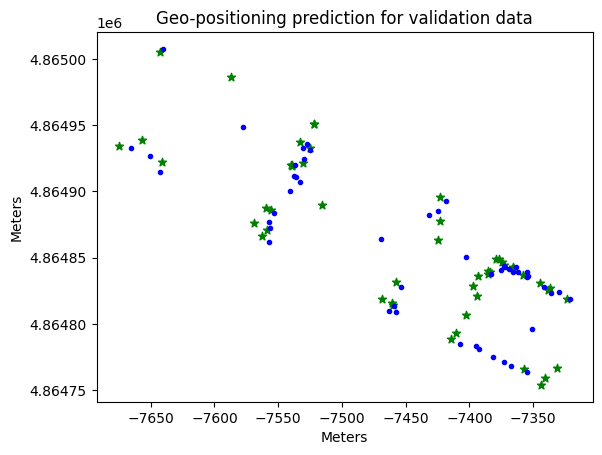

In [12]:
# Plot results
import matplotlib.pyplot as plt

pred_v_base = []
for Y_pred in pred_v:
  pred_v_base.append(de_norm_Y(Y_pred))
pred_v_base = array(pred_v_base)

plt.scatter(Y_v_base[:50, 0], Y_v_base[:50, 1],
         marker= "*", label= "Ground truth", color= "green")

plt.scatter(pred_v_base[:50, 0], pred_v_base[:50, 1],
         marker= ".", label= "Predicted position", color= "blue")
  
# naming the x axis
plt.xlabel('Meters')
# naming the y axis
plt.ylabel('Meters')
  
# giving a title to my graph
plt.title('Geo-positioning prediction for validation data')
  
# function to show the plot
plt.show()

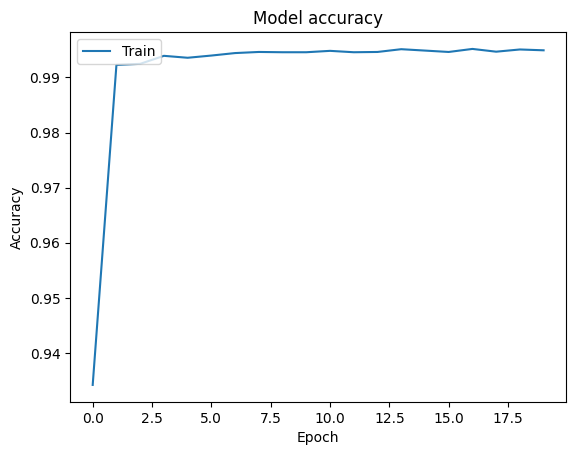

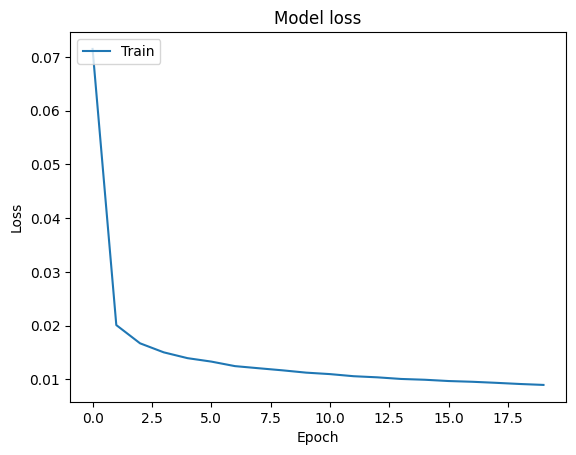

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()